# ESDC Data Access with Python

In [3]:
from cablab import Cube
%matplotlib inline

In [4]:
cube = Cube.open("C:\\Users\\Norman\\EOData\\ESDC\\low-res")

In [5]:
cube.data.variable_names

['aerosol_optical_thickness_1610',
 'aerosol_optical_thickness_550',
 'aerosol_optical_thickness_555',
 'aerosol_optical_thickness_659',
 'aerosol_optical_thickness_865',
 'air_temperature_2m',
 'bare_soil_evaporation',
 'black_sky_albedo',
 'burnt_area',
 'country_mask',
 'c_emissions',
 'evaporation',
 'evaporative_stress',
 'fractional_snow_cover',
 'gross_primary_productivity',
 'interception_loss',
 'land_surface_temperature',
 'latent_energy',
 'net_ecosystem_exchange',
 'open_water_evaporation',
 'ozone',
 'potential_evaporation',
 'precipitation',
 'root_moisture',
 'sensible_heat',
 'snow_sublimation',
 'snow_water_equivalent',
 'soil_moisture',
 'srex_mask',
 'surface_moisture',
 'terrestrial_ecosystem_respiration',
 'transpiration',
 'water_mask',
 'water_vapour',
 'white_sky_albedo']

In [6]:
ds = cube.data.dataset()

Now `ds` represents the entire cube data as an object of type [xarray.Dataset](http://xarray.pydata.org/en/stable/data-structures.html#dataset):

In [7]:
ds

<xarray.Dataset>
Dimensions:                            (bnds: 2, lat: 720, lon: 1440, time: 506)
Coordinates:
  * time                               (time) datetime64[ns] 2001-01-05 ...
  * lon                                (lon) float32 -179.875 -179.625 ...
    lon_bnds                           (lon, bnds) float32 -180.0 -179.75 ...
    lat_bnds                           (lat, bnds) float32 89.75 90.0 89.5 ...
  * lat                                (lat) float32 89.875 89.625 89.375 ...
    time_bnds                          (time, bnds) datetime64[ns] 2001-01-01 ...
Dimensions without coordinates: bnds
Data variables:
    aerosol_optical_thickness_1610     (time, lat, lon) float64 nan nan nan ...
    aerosol_optical_thickness_550      (time, lat, lon) float64 nan nan nan ...
    aerosol_optical_thickness_555      (time, lat, lon) float64 nan nan nan ...
    aerosol_optical_thickness_659      (time, lat, lon) float64 nan nan nan ...
    aerosol_optical_thickness_865      (time, la

In [8]:
lst = ds['land_surface_temperature']

The variable `lst` is an [xarray.DataArray](http://xarray.pydata.org/en/stable/data-structures.html#dataarray):

In [9]:
lst

<xarray.DataArray 'land_surface_temperature' (time: 506, lat: 720, lon: 1440)>
dask.array<concatenate, shape=(506, 720, 1440), dtype=float64, chunksize=(46, 720, 1440)>
Coordinates:
  * time     (time) datetime64[ns] 2001-01-05 2001-01-13 2001-01-21 ...
  * lon      (lon) float32 -179.875 -179.625 -179.375 -179.125 -178.875 ...
  * lat      (lat) float32 89.875 89.625 89.375 89.125 88.875 88.625 88.375 ...
Attributes:
    url:            http://data.globtemperature.info/
    long_name:      land surface temperature
    source_name:    LST
    standard_name:  surface_temperature
    comment:        Advanced Along Track Scanning Radiometer pixel land surfa...
    units:          K

The `DataArray.sel()` methods allows for selecting slices and subsets of data. 

In [27]:
lst_point = lst.sel(time='2006-06-15', lat=53, lon=11, method='nearest')

In [28]:
lst_point

<xarray.DataArray 'land_surface_temperature' ()>
dask.array<getitem, shape=(), dtype=float64, chunksize=()>
Coordinates:
    time     datetime64[ns] 2006-06-14
    lon      float32 11.125
    lat      float32 53.125
Attributes:
    url:            http://data.globtemperature.info/
    long_name:      land surface temperature
    source_name:    LST
    standard_name:  surface_temperature
    comment:        Advanced Along Track Scanning Radiometer pixel land surfa...
    units:          K

Data arrays and their subsets can be easily displayed using the `DataArray.plot()` method:

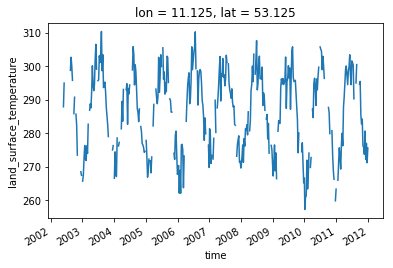

In [12]:
lst.sel(lat=53, lon=11, method='nearest').plot()

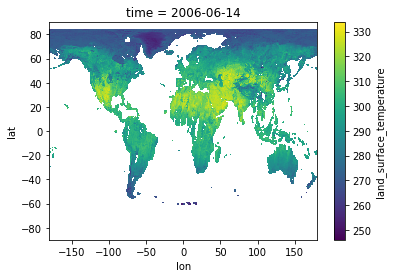

In [13]:
lst.sel(time='2006-06-15', method='nearest').plot()

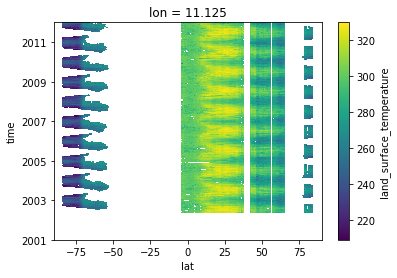

In [14]:
lst.sel(lon=11, method='nearest').plot()

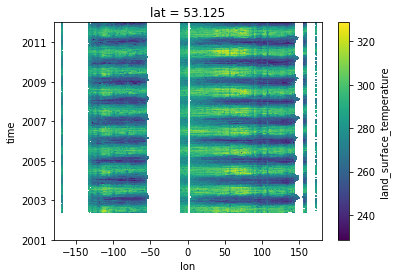

In [15]:
lst.sel(lat=53, method='nearest').plot()

In [16]:
oz = ds['ozone']

In [17]:
oz

<xarray.DataArray 'ozone' (time: 506, lat: 720, lon: 1440)>
dask.array<concatenate, shape=(506, 720, 1440), dtype=float64, chunksize=(46, 720, 1440)>
Coordinates:
  * time     (time) datetime64[ns] 2001-01-05 2001-01-13 2001-01-21 ...
  * lon      (lon) float32 -179.875 -179.625 -179.375 -179.125 -178.875 ...
  * lat      (lat) float32 89.875 89.625 89.375 89.125 88.875 88.625 88.375 ...
Attributes:
    url:            http://www.esa-ozone-cci.org/
    long_name:      mean total ozone column in dobson units
    source_name:    atmosphere_mole_content_of_ozone
    standard_name:  atmosphere_mole_content_of_ozone
    comment:        Atmospheric ozone based on the Ozone CCI data.
    units:          DU
    references:     Laeng, A., et al. "The ozone climate change initiative: C...

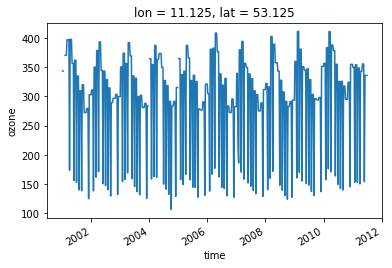

In [18]:
oz.sel(lat=53, lon=11, method='nearest').plot()

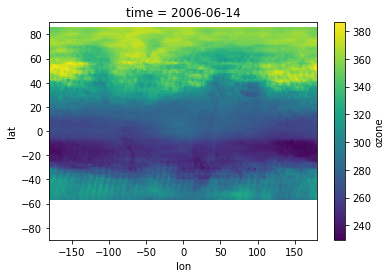

In [19]:
oz.sel(time='2006-06-15', method='nearest').plot()

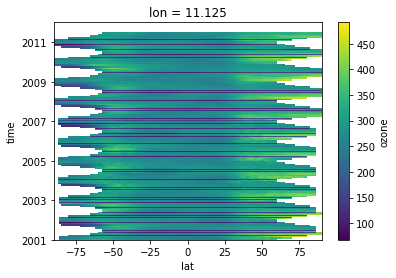

In [20]:
oz.sel(lon=11, method='nearest').plot()

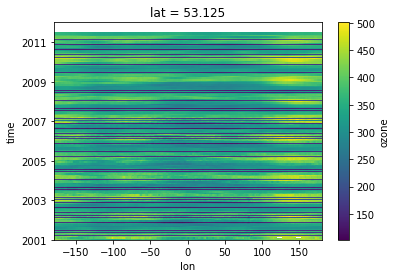

In [21]:
oz.sel(lat=53, method='nearest').plot()